# Comparando SVM com outros algoritmos (Regressão - Qualidade Vinhos)

In [1]:
import trab03_utils as util

ds_dadosbrutos = util.getDSWine_RED()
ds_dadosbrutos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
import autoML

automl = autoML.AutoML(ds_dadosbrutos, 'quality'
                             , min_x_y_correlation_rate=0.20
                             , n_features_threshold=0.75)

dfResults = automl.getResults()
dfResults.head(10)

,algorithm,features,n_features,train_time,mem_max,r2,neg_mean_absolute_error,neg_mean_squared_error
0,LinearRegression,"(volatile acidity, sulphates, alcohol)",3,4.553148,202.160156,0.333393,-0.094169,-0.015700
1,LinearRegression,"(volatile acidity, citric acid, sulphates, alc...",4,5.178391,202.347656,0.325921,-0.095163,-0.015828
2,LinearRegression,"(volatile acidity, citric acid, alcohol)",3,3.254045,202.359375,0.300605,-0.097956,-0.016433
3,LinearRegression,"(citric acid, sulphates, alcohol)",3,4.704993,202.253906,0.298444,-0.095554,-0.016520
4,KNeighborsRegressor,"(volatile acidity, sulphates, alcohol)",3,5.199398,202.031250,0.235586,-0.098750,-0.018000
5,SVR,"(volatile acidity, sulphates, alcohol)",3,4.923653,205.234375,0.223576,-0.113434,-0.018313
6,SVR,"(citric acid, sulphates, alcohol)",3,5.299597,205.269531,0.184024,-0.115802,-0.019307
7,SVR,"(volatile acidity, citric acid, sulphates, alc...",4,4.132933,205.644531,0.179338,-0.113559,-0.019263
8,KNeighborsRegressor,"(citric acid, sulphates, alcohol)",3,4.570702,202.238281,0.169381,-0.104750,-0.019560
9,SVR,"(volatile acidity, citric acid, alcohol)",3,2.670618,205.093750,0.167897,-0.115954,-0.019567


In [14]:
dfGroupBy_algorithm = dfResults.groupby('algorithm').mean().sort_values('r2', ascending=False)
dfGroupBy_algorithm

,train_time,mem_max,r2,neg_mean_absolute_error,neg_mean_squared_error
algorithm,,,,,
LinearRegression,4.526788,202.239062,0.278752,-0.099379,-0.016933
SVR,4.464784,205.349219,0.173585,-0.115733,-0.019458
KNeighborsRegressor,4.552171,202.339844,0.146431,-0.106850,-0.020048
DecisionTreeRegressor,4.589745,202.239062,-0.445792,-0.121563,-0.032875


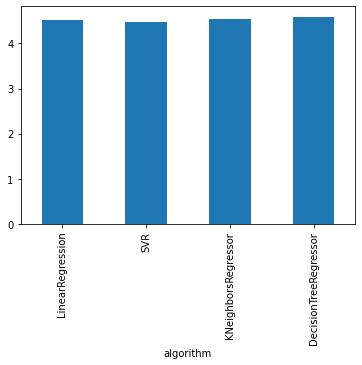

In [15]:
dfGroupBy_algorithm['train_time'].plot.bar();

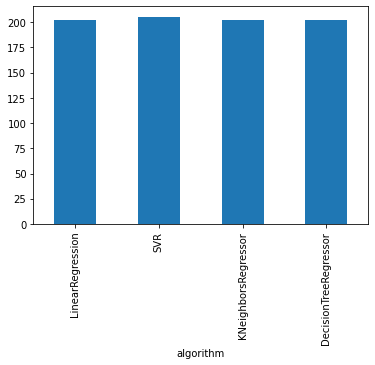

In [16]:
dfGroupBy_algorithm['mem_max'].plot.bar();

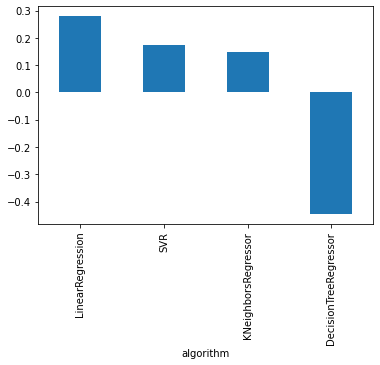

In [17]:
dfGroupBy_algorithm['r2'].plot.bar();

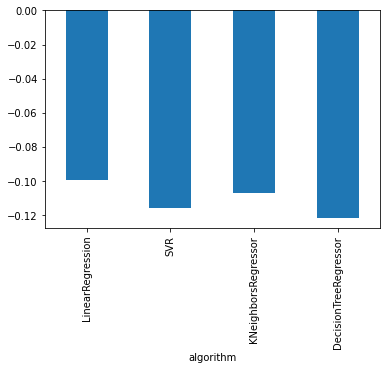

In [18]:
dfGroupBy_algorithm['neg_mean_absolute_error'].plot.bar();

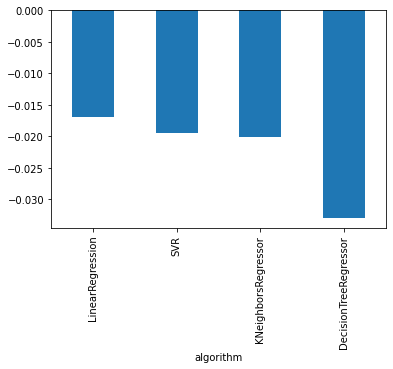

In [19]:
dfGroupBy_algorithm['neg_mean_squared_error'].plot.bar();